In [487]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [488]:
customers = pd.read_csv('./dacon_data/open/customers.csv')
locations = pd.read_csv('./dacon_data/open/locations.csv')
orders = pd.read_csv('./dacon_data/open/orders.csv')
order_items = pd.read_csv('./dacon_data/open/order_items.csv')
payments = pd.read_csv('./dacon_data/open/payments.csv')
products = pd.read_csv('./dacon_data/open/products.csv')
reviews = pd.read_csv('./dacon_data/open/reviews.csv')
sellers = pd.read_csv('./dacon_data/open/sellers.csv')

In [489]:
locations

,Geolocation_zipcode_prefix,Geolocation_lat,Geolocation_lng,Geolocation_city,Geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [490]:
# 고객과 관련된 정보
# Customer_id : 고객 ID
# Customer_unique_id : 고객 고유 ID - 이걸로 분류하면 될것같은
# Customer_zipcode_prefix : 고객 우편번호 앞부분
# Customer_city : 고객 도시
# Customer_state : 고객 주

# locations.csv [파일]
# 지역과 관련된 정보
# Geolocation_zipcode_prefix : 우편번호 앞부분
# Geolocation_lat : 위도
# Geolocation_lng : 경도
# Geolocation_city : 도시(city)
# Geolocation_state : 주(state)

# orders.csv [파일]
# 주문과 관련된 정보
# Order_id : 주문 고유 ID
# Customer_id : 고객 ID
# Order_status : 주문 상태
# Order_purchase_timestamp : 구매 시간
# Order_delivered_carrier_date : 물류 처리 시간
# Order_delivered_customer_date : 실제 배송 날짜 
# Order_estimated_delivery_date : 기대 배송 날짜 --이것과 리뷰점수가 연관성이 있을까 그러면 좀더 기대배송날짜ㅏ를 실제배송날짜에 근사하게 말한다면?

# order_items.csv [파일]
# 주문 아이템과 관련된 정보
# Order_id : 주문 고유 ID
# Order_item_id : 동일한 주문에 포함된 품목 수를 식별하는 일련 번호
# Product_id : 제품 고유 ID
# Seller_id : 판매자 고유 ID
# Price : 판매 가격
# Freight_value : 품목 화물 가격

# payments.csv [파일]
# 지불과 관련된 정보
# Order_id : 주문 고유 ID
# Payment_sequential : 결제 시퀀스(둘 이상의 결제 방법으로 결제 가능)
# Payment_type : 지불 방법 
# Payment_installments : 할부 횟수
# Payment_value : 거래 가치
# 부자들은 일시불 없는분들ㅂ 할부 등가손실

# products.csv [파일]
# 제품과 관련된 정보
# Product_id : 제품 고유 ID
# Product_category_name : 카테고리 이름
# Product_weight_g : 제품 무게(g)
# Product_length_cm : 제품 길이(cm)
# Product_height_cm : 제품 높이(cm)
# Product_width_cm : 제품 너비(cm)

# reviews.csv[파일]
# Review_id : 리뷰 고유 ID
# Order_id : 주문 고유 ID
# Review_score : 리뷰 점수
# Review_creation_date : 리뷰 생성 시간
# Review_answer_timestamp : 리뷰 답변 시간 --


# sellers.csv[파일]
# Seller_id : 판매자 고유 ID
# Seller_zipcode_prefix : 판매자 우편번호 앞자리
# Seller_city : 판매자 도시(city)
# Seller_state : 판매자 주(state)

In [491]:
# left써야겠다.

In [492]:
# reviews.shape #87873
# reviews.Order_id.unique().size #87349
# reviews.Order_id.value_counts()

In [493]:
# order_items.shape #100557
# order_items.Order_id.unique().size #87954
# order_items[order_items.Order_id=="ORDER_29361"]

In [494]:
# shape 모양 변화 일일일 확인해보기
#데이터 머지하고 필요없는 컬럼 삭제
temp = pd.merge(reviews,order_items, how='inner',on='Order_id')
temp = pd.merge(temp,orders, how='inner',on='Order_id')
temp = pd.merge(temp,payments, how='inner',on='Order_id')
temp = pd.merge(temp,products, how='inner',on='Product_id')
temp = pd.merge(temp,customers, how='inner',on='Customer_id')
temp = pd.merge(temp,sellers, how='inner',on='Seller_id')
temp = temp.drop(["Review_creation_date","Review_answer_timestamp","Order_status","Payment_sequential","Payment_type","Payment_installments"],axis=1)
temp = temp.drop(["Product_weight_g","Product_length_cm","Product_height_cm","Customer_zipcode_prefix","Seller_zipcode_prefix"],axis=1)
temp = temp.drop(["Product_width_cm"],axis=1)

In [495]:
# 

In [496]:
test= temp.copy() #test용

In [497]:
test.shape

(104956, 20)

In [498]:
# test_city_max
# 비율이 적다고 무시하지말고 어디가 매출이 있는지를 계산해보자

In [499]:
test.head(1)

,Review_id,Order_id,Review_score,Order_item_id,Product_id,Seller_id,Price,Freight_value,Customer_id,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date,Payment_value,Product_category_name,Customer_unique_id,Customer_city,Customer_state,Seller_city,Seller_state
0,REVIEW_00000,ORDER_01674,4,1,PRODUCT_21853,SELLER_0286,185.0,13.63,CUSTOMER_38995,2019-01-11 15:30:49,2019-01-12 21:57:22,2019-01-17 18:42:41,2019-02-02,397.26,sports_leisure,CUSTOMER_Unique_38397,osasco,SP,sao joaquim da barra,SP


In [500]:
test['Order_purchase_timestamp']=pd.to_datetime(test['Order_purchase_timestamp'])
test['YearMonth'] = test['Order_purchase_timestamp'].dt.strftime('%Y%m') #월별로 분류
test["earn"] = (test['Price']-test["Freight_value"]) * test['Order_item_id'] #화물가치빼기
test[['Order_delivered_carrier_date','Order_delivered_customer_date']] = test[['Order_delivered_carrier_date','Order_delivered_customer_date']].apply(pd.to_datetime)  # format='%Y-%m-%d %H:%M:%S.%f'
test['time_gap'] = test['Order_delivered_customer_date'] - test['Order_delivered_carrier_date']
# test['real_gap'] = test['Order_delivered_customer_date'] - test['Order_estimated_delivery_date']

In [501]:
test.head(1)

,Review_id,Order_id,Review_score,Order_item_id,Product_id,Seller_id,Price,Freight_value,Customer_id,Order_purchase_timestamp,...,Payment_value,Product_category_name,Customer_unique_id,Customer_city,Customer_state,Seller_city,Seller_state,YearMonth,earn,time_gap
0,REVIEW_00000,ORDER_01674,4,1,PRODUCT_21853,SELLER_0286,185.0,13.63,CUSTOMER_38995,2019-01-11 15:30:49,...,397.26,sports_leisure,CUSTOMER_Unique_38397,osasco,SP,sao joaquim da barra,SP,201901,171.37,4 days 20:45:19


In [502]:
# test["Order_delivered_customer_date"]

In [503]:
test_city = test.groupby(["Customer_state"])["Customer_city"].count().reset_index()
test_city["ratio"]=test_city["Customer_city"].apply(lambda x : x/test.shape[0])

In [560]:
# test[test.Customer_state=="SP"]

In [504]:
test.head(1)

,Review_id,Order_id,Review_score,Order_item_id,Product_id,Seller_id,Price,Freight_value,Customer_id,Order_purchase_timestamp,...,Payment_value,Product_category_name,Customer_unique_id,Customer_city,Customer_state,Seller_city,Seller_state,YearMonth,earn,time_gap
0,REVIEW_00000,ORDER_01674,4,1,PRODUCT_21853,SELLER_0286,185.0,13.63,CUSTOMER_38995,2019-01-11 15:30:49,...,397.26,sports_leisure,CUSTOMER_Unique_38397,osasco,SP,sao joaquim da barra,SP,201901,171.37,4 days 20:45:19


In [505]:
test_city

,Customer_state,Customer_city,ratio
0,AC,82,0.000781
1,AL,407,0.003878
2,AM,146,0.001391
3,AP,74,0.000705
4,BA,3589,0.034195
5,CE,1392,0.013263
6,DF,2196,0.020923
7,ES,2108,0.020085
8,GO,2173,0.020704
9,MA,753,0.007174


In [506]:
test_city_time_diff=test.groupby(["Customer_state"])["time_gap"].sum().reset_index()

In [507]:
test_city_time_diff

,Customer_state,time_gap
0,AC,1477 days 08:48:18
1,AL,8661 days 10:51:53
2,AM,3579 days 13:11:26
3,AP,1833 days 18:13:13
4,BA,57976 days 13:28:38
5,CE,24896 days 23:34:05
6,DF,21950 days 06:55:03
7,ES,25981 days 14:39:35
8,GO,27289 days 11:03:30
9,MA,13587 days 12:47:35


In [508]:
test_city_payment_value = test.groupby(["Customer_state"])["Payment_value"].sum().reset_index()

In [509]:
# test_city_payment_value

In [510]:
test_city_review=test.groupby(["Customer_state"])["Review_score"].sum().reset_index()

In [511]:
# test_city_review

In [512]:
test_city_max = test.groupby(["Customer_state"])["earn"].sum().reset_index()

In [513]:
test_city_max = pd.merge(test_city_payment_value,test_city_max, how='inner',on='Customer_state')

In [514]:
test_city_max = pd.merge(test_city_time_diff,test_city_max, how='inner',on='Customer_state')

In [515]:
test_city_max = pd.merge(test_city_review,test_city_max, how='inner',on='Customer_state')

In [516]:
test_city_max

,Customer_state,Review_score,time_gap,Payment_value,earn
0,AC,330,1477 days 08:48:18,19283.82,12337.51
1,AL,1546,8661 days 10:51:53,100272.34,65097.55
2,AM,601,3579 days 13:11:26,30492.53,16454.98
3,AP,318,1833 days 18:13:13,19580.30,10991.16
4,BA,13792,57976 days 13:28:38,709906.51,430107.97
5,CE,5367,24896 days 23:34:05,304577.93,187567.43
6,DF,8889,21950 days 06:55:03,381425.56,253699.20
7,ES,8405,25981 days 14:39:35,351893.68,222426.31
8,GO,8725,27289 days 11:03:30,410104.57,259036.00
9,MA,2809,13587 days 12:47:35,183052.09,88832.58


In [517]:
test_city_max.head(1)

,Customer_state,Review_score,time_gap,Payment_value,earn
0,AC,330,1477 days 08:48:18,19283.82,12337.51


In [557]:
test_city.head(1)

,Customer_state,Customer_city,ratio
0,AC,82,0.000781


In [519]:
test_city_ratio_earn= pd.merge(test_city, test_city_max, on='Customer_state', how='inner')

In [520]:
test_city_ratio_earn["time_mean_gap"] = test_city_ratio_earn["time_gap"] / test_city_ratio_earn["Customer_city"]

In [521]:
test_city_ratio_earn["review_mean_gap"] = test_city_ratio_earn["Review_score"] / test_city_ratio_earn["Customer_city"]

In [556]:
test_city_ratio_earn

,Customer_state,Customer_city,ratio,time_mean_gap,review_mean_gap,earn_ratio,ratio_gap,just_days
0,AC,82,0.000781,18 days 00:24:00.219512195,4.024390,0.001049,0.000268,18
1,AL,407,0.003878,21 days 06:44:56.592137592,3.798526,0.005534,0.001656,21
2,AM,146,0.001391,24 days 12:25:08.808219178,4.116438,0.001399,0.000008,24
3,AP,74,0.000705,24 days 18:43:57.743243243,4.297297,0.000934,0.000229,24
4,BA,3589,0.034195,16 days 03:41:42.122596823,3.842853,0.036565,0.002370,16
5,CE,1392,0.013263,17 days 21:15:29.917385057,3.855603,0.015946,0.002683,17
6,DF,2196,0.020923,9 days 23:53:37.897540983,4.047814,0.021568,0.000645,9
7,ES,2108,0.020085,12 days 07:48:20.936907020,3.987192,0.018909,-0.001175,12
8,GO,2173,0.020704,12 days 13:24:08.048780487,4.015186,0.022022,0.001318,12
9,MA,753,0.007174,18 days 01:04:07.616201859,3.730412,0.007552,0.000378,18


In [523]:
all_earn_sum = test_city_ratio_earn["earn"].sum()

In [524]:
all_earn_sum # 전체 벌어들인 돈

11762681.18

In [525]:
test_city_ratio_earn["earn_ratio"] = test_city_ratio_earn["earn"].apply(lambda x : x/all_earn_sum)

In [526]:
test_city_ratio_earn.head(1)

,Customer_state,Customer_city,ratio,Review_score,time_gap,Payment_value,earn,time_mean_gap,review_mean_gap,earn_ratio
0,AC,82,0.000781,330,1477 days 08:48:18,19283.82,12337.51,18 days 00:24:00.219512195,4.02439,0.001049


In [527]:
test_city_ratio_earn.Customer_state.size

27

In [528]:
test_city_ratio_earn["ratio_gap"] = test_city_ratio_earn["earn_ratio"] - test_city_ratio_earn["ratio"]

[Text(0, 0, 'AC'),
 Text(1, 0, 'AL'),
 Text(2, 0, 'AM'),
 Text(3, 0, 'AP'),
 Text(4, 0, 'BA'),
 Text(5, 0, 'CE'),
 Text(6, 0, 'DF'),
 Text(7, 0, 'ES'),
 Text(8, 0, 'GO'),
 Text(9, 0, 'MA'),
 Text(10, 0, 'MG'),
 Text(11, 0, 'MS'),
 Text(12, 0, 'MT'),
 Text(13, 0, 'PA'),
 Text(14, 0, 'PB'),
 Text(15, 0, 'PE'),
 Text(16, 0, 'PI'),
 Text(17, 0, 'PR'),
 Text(18, 0, 'RJ'),
 Text(19, 0, 'RN'),
 Text(20, 0, 'RO'),
 Text(21, 0, 'RR'),
 Text(22, 0, 'RS'),
 Text(23, 0, 'SC'),
 Text(24, 0, 'SE'),
 Text(25, 0, 'SP'),
 Text(26, 0, 'TO')]

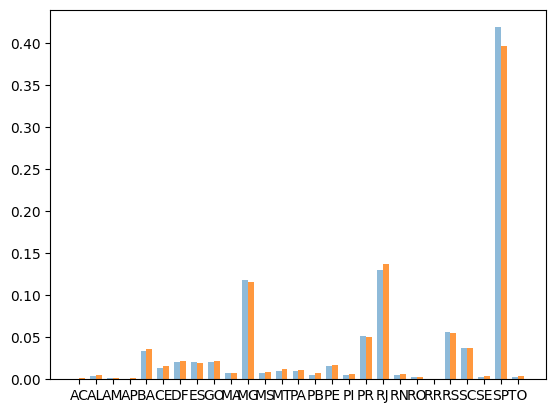

In [529]:
import matplotlib.pyplot as plt
x=np.arange(27)
width = 0.35
fig, axes = plt.subplots()
axes.bar(x - width/2, test_city_ratio_earn["ratio"], width, alpha = 0.5) #물품비율
axes.bar(x + width/2, test_city_ratio_earn["earn_ratio"], width, alpha = 0.8) #매출비율
plt.xticks(x)
axes.set_xticklabels(test_city_ratio_earn["Customer_state"])



/home/jotaesik/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jotaesik/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48260 (\N{HANGUL SYLLABLE BEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jotaesik/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45716 (\N{HANGUL SYLLABLE NEUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jotaesik/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jotaesik/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  fig.canvas.print_figure(

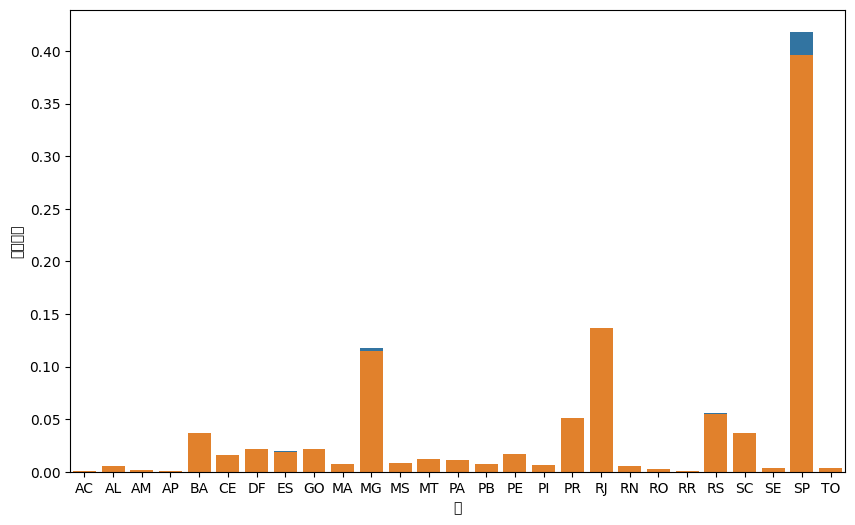

In [530]:
plt.figure(figsize=(10, 6))

# sns.barplot(x='Customer_state', y='earn_ratio', data=test_city_ratio_earn)
sns.barplot(x='Customer_state', y='ratio', data=test_city_ratio_earn)
sns.barplot(x='Customer_state', y='earn_ratio', data=test_city_ratio_earn)
plt.xlabel('주')
plt.ylabel('버는금액')
plt.show()

In [531]:
test_city_ratio_earn_top14 = test_city_ratio_earn.sort_values(["earn_ratio"],ascending=False)[:14]
#1퍼 이상은 14개로 간주

In [532]:
# test_city_ratio_earn_top14
# test_city_ratio_earn["real_value-earn"] = test_city_ratio_earn["earn"] - test_city_ratio_earn["Payment_value"]

In [533]:
test_city_ratio_earn.head(1)

,Customer_state,Customer_city,ratio,Review_score,time_gap,Payment_value,earn,time_mean_gap,review_mean_gap,earn_ratio,ratio_gap
0,AC,82,0.000781,330,1477 days 08:48:18,19283.82,12337.51,18 days 00:24:00.219512195,4.02439,0.001049,0.000268


In [534]:
test_city_ratio_earn = test_city_ratio_earn.drop(["Payment_value","Review_score","time_gap","earn"],axis=1)

In [535]:
test_city_ratio_earn["just_days"] = test_city_ratio_earn["time_mean_gap"].apply(lambda x : int(str(x).split("days")[0]))
#달에 따라 분류해서 추이를 알아봐도좋다

In [536]:
test_city_ratio_earn.head(1)

,Customer_state,Customer_city,ratio,time_mean_gap,review_mean_gap,earn_ratio,ratio_gap,just_days
0,AC,82,0.000781,18 days 00:24:00.219512195,4.02439,0.001049,0.000268,18


In [537]:
test_city_ratio_earn.corr(numeric_only=True, method='pearson')

,Customer_city,ratio,review_mean_gap,earn_ratio,ratio_gap,just_days
Customer_city,1.000000,1.000000,0.254157,0.999465,-0.835409,-0.653167
ratio,1.000000,1.000000,0.254157,0.999465,-0.835409,-0.653167
review_mean_gap,0.254157,0.254157,1.000000,0.243676,-0.386096,-0.235865
earn_ratio,0.999465,0.999465,0.243676,1.000000,-0.816978,-0.666595
ratio_gap,-0.835409,-0.835409,-0.386096,-0.816978,1.000000,0.314225
just_days,-0.653167,-0.653167,-0.235865,-0.666595,0.314225,1.000000


In [538]:
#일단 크게 품목에 따라서 혹은 주에 따라서 분류할수있다  #월별로 분류 총 3개의 kpi가 나온다
# Product_category_name : 카테고리 이름
# ratio_gap을 올리는 방향을 ㅗ해본느게 좋지않을/까
test_city_ratio_earn.sort_values(["ratio_gap"]) #양수일수록좋은거
# test_city_ratio_earn["ratio_gap"] = test_city_ratio_earn["ratio_gap"]*100

,Customer_state,Customer_city,ratio,time_mean_gap,review_mean_gap,earn_ratio,ratio_gap,just_days
25,SP,43918,0.418442,0 days 19:52:20.163971274,4.175964,0.396472,-0.021970,0
10,MG,12380,0.117954,-9 days +16:49:01.299458033,4.110016,0.115097,-0.002857,-9
7,ES,2108,0.020085,12 days 07:48:20.936907020,3.987192,0.018909,-0.001175,12
22,RS,5883,0.056052,12 days 06:03:25.777834438,4.061533,0.054940,-0.001112,12
17,PR,5396,0.051412,8 days 21:43:52.494069681,4.126019,0.050762,-0.000650,8
21,RR,42,0.000400,24 days 15:52:45.142857142,3.785714,0.000398,-0.000002,24
2,AM,146,0.001391,24 days 12:25:08.808219178,4.116438,0.001399,0.000008,24
20,RO,264,0.002515,17 days 03:57:35.560606060,4.056818,0.002676,0.000161,17
23,SC,3880,0.036968,11 days 22:03:39.583247422,4.021392,0.037144,0.000176,11
3,AP,74,0.000705,24 days 18:43:57.743243243,4.297297,0.000934,0.000229,24


In [539]:
test_city_ratio_earn_minus = test_city_ratio_earn[test_city_ratio_earn.ratio_gap <0]

In [540]:
test_city_ratio_earn_minus

,Customer_state,Customer_city,ratio,time_mean_gap,review_mean_gap,earn_ratio,ratio_gap,just_days
7,ES,2108,0.020085,12 days 07:48:20.936907020,3.987192,0.018909,-0.001175,12
10,MG,12380,0.117954,-9 days +16:49:01.299458033,4.110016,0.115097,-0.002857,-9
17,PR,5396,0.051412,8 days 21:43:52.494069681,4.126019,0.050762,-0.000650,8
21,RR,42,0.000400,24 days 15:52:45.142857142,3.785714,0.000398,-0.000002,24
22,RS,5883,0.056052,12 days 06:03:25.777834438,4.061533,0.054940,-0.001112,12
25,SP,43918,0.418442,0 days 19:52:20.163971274,4.175964,0.396472,-0.021970,0


In [547]:
test_city_ratio_earn_minus["temp"] = -(test_city_ratio_earn_minus["earn_ratio"] / test_city_ratio_earn_minus["ratio_gap"])

/tmp/ipykernel_31199/1975316530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_city_ratio_earn_minus["temp"] = -(test_city_ratio_earn_minus["earn_ratio"] / test_city_ratio_earn_minus["ratio_gap"])


In [548]:
test_city_ratio_earn_minus

,Customer_state,Customer_city,ratio,time_mean_gap,review_mean_gap,earn_ratio,ratio_gap,just_days,temp
7,ES,2108,0.020085,12 days 07:48:20.936907020,3.987192,0.018909,-0.001175,12,16.091592
10,MG,12380,0.117954,-9 days +16:49:01.299458033,4.110016,0.115097,-0.002857,-9,40.284269
17,PR,5396,0.051412,8 days 21:43:52.494069681,4.126019,0.050762,-0.000650,8,78.112173
21,RR,42,0.000400,24 days 15:52:45.142857142,3.785714,0.000398,-0.000002,24,197.735710
22,RS,5883,0.056052,12 days 06:03:25.777834438,4.061533,0.054940,-0.001112,12,49.408114
25,SP,43918,0.418442,0 days 19:52:20.163971274,4.175964,0.396472,-0.021970,0,18.046004


In [ ]:
# temp의 값은 그 지역이 벌어들이는 매출비율 / RATIO GAP( 전체지역에서 차지하는 비율 - 벌어들이는 매출비율)

In [ ]:
# 마이너스인 국가들 이유찾아보기

In [541]:
# type(test_city_ratio_earn_minus.iloc[1,"earn_ratio"])

In [542]:
# test_city_ratio_earn_minus["ratio_gap"].iloc[1] / test_city_ratio_earn_minus["earn_ratio"].iloc[1]

In [543]:
# for i in range(len(test_city_ratio_earn_minus)):
#     tmp = test_city_ratio_earn_minus["ratio_gap"].iloc[i] / test_city_ratio_earn_minus["earn_ratio"].iloc[i]
#     test_city_ratio_earn_minus.loc[i,"temp"] = tmp


In [544]:
# test_city_ratio_earn_minus
# test_city_ratio_earn_minus